# Project 4 

## Problem Statement

## Executive Summary

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyreadr

import myfunctions as f

import io

%matplotlib inline

### Data Import

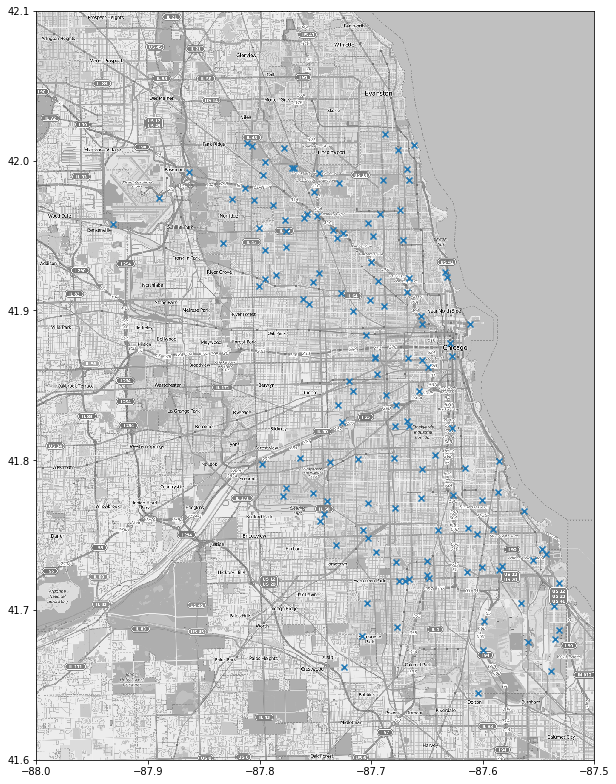

In [2]:

df_train = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')
df_spray = pd.read_csv('../datasets/spray.csv')
df_weather = pd.read_csv('../datasets/weather.csv')

## EDA

In [ ]:
traps = df_train[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]
f.gen_map()

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x');

In [3]:
df_weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [11]:
df_weather.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

C:\Users\anpej\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


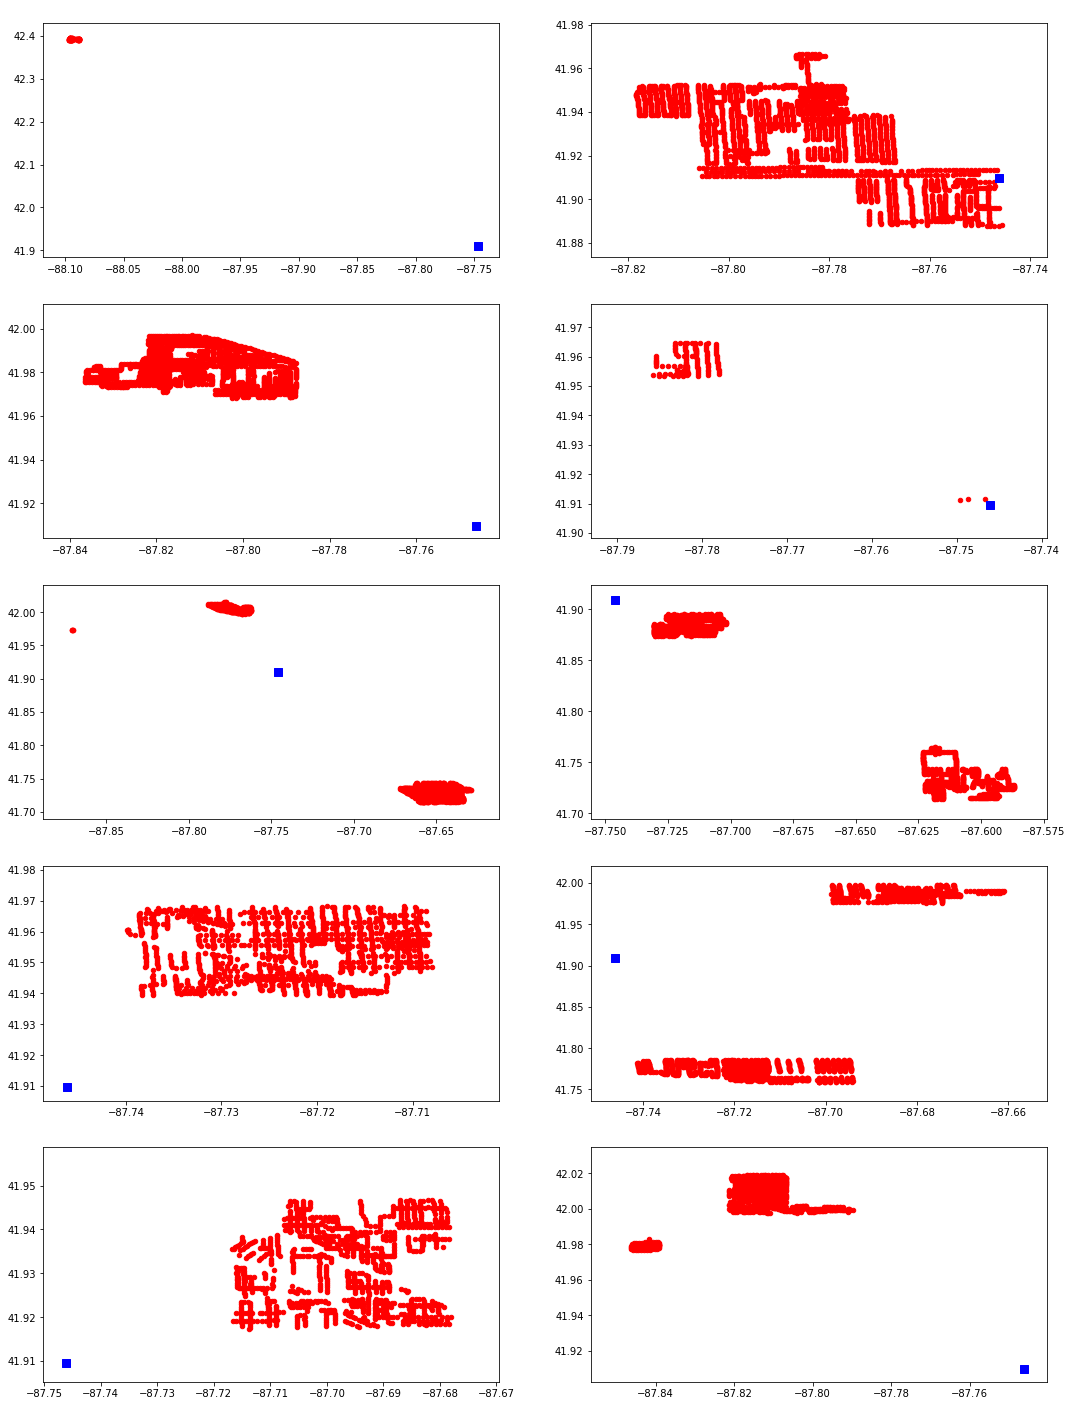

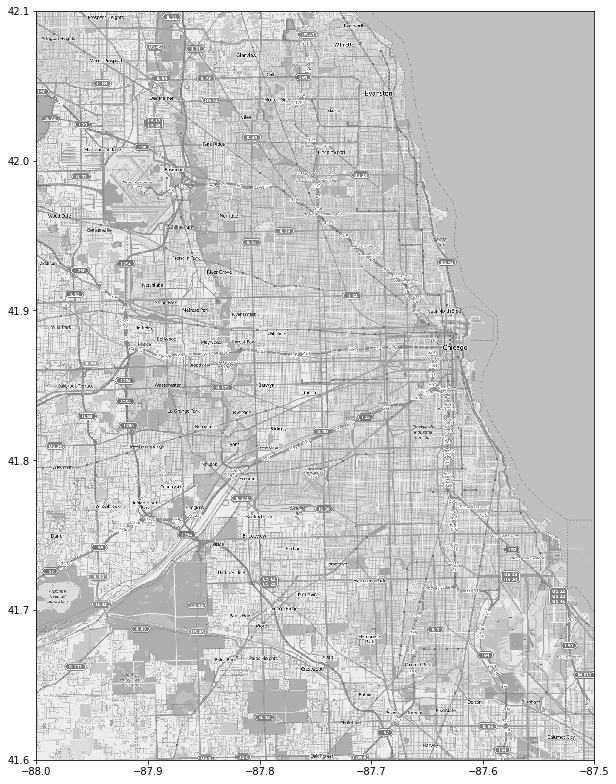

In [6]:
spray_days = df_spray.groupby('Date')['Latitude','Longitude'].max()
fig, axes = plt.subplots(5,2,figsize=(18,25))
f.gen_map()
for i in range(0,10):
    df_temp = df_spray[df_spray['Date']==spray_days.index[i]]
    origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
    upperRight = [42.1, -87.5]          # lat/long of upper right corner


    # generate some data to overlay
    numPoints = 50
    lats = df_temp['Latitude']
    longs = df_temp['Longitude']

    intersection = [41.909614, -87.746134]  # co-ordinates of intersection of IL64 / IL50 according to Google Earth

    if i <=4:
        c=0
        a = i
    else:
        c=1
        a = i-5
    # generate plot
    
    axes[a,c].scatter(x=longs, y=lats, c='r', s=20)
    axes[a,c].scatter(x=intersection[1], y=intersection[0], c='b', s=60, marker='s')
    axes[a,c].set_title(spray_days.index[i],color='white')
    
plt.show()

In [ ]:
# Adding a new cell for testing push - Bryan

In [ ]:
# Second cell update - bRyan

### Weather Data
---

In [ ]:
import datetime as dt

In [ ]:
df_weather.columns = df_weather.columns.str.lower()

In [ ]:
df_weather.head()

In [ ]:
df_weather.info()

In [ ]:
# Replace M, blank spaces and '-' with Nan values, while T was replace with 0.05
# https://wgntv.com/weather/what-are-traces-of-precipitation/
def update_cols(df_weather):
    df_weather = df_weather.replace('M', np.nan)
    df_weather = df_weather.replace('-', np.nan)
    df_weather = df_weather.replace(' ', np.nan)
    df_weather = df_weather.replace('  T', '0.05')

    df_weather = update_cols(df_weather)

In [ ]:
# Check for null
df_weather.isnull().sum().sort_values(ascending=False)

In [ ]:
# Drop water1 column as its missing all the data
df_weather.drop(['water1'], axis = 1, inplace= True)

# Fiil up blank cells in codesum with 'MODERATE'
df_weather['codesum'] = df_weather['codesum'].replace(np.nan, 'MODERATE')

# Fill null values with column median
df_weather['preciptotal'] = df_weather['preciptotal'].fillna(df_weather['preciptotal'].median())
df_weather['avgspeed'] = df_weather['avgspeed'].fillna(df_weather['avgspeed'].median())
df_weather['wetbulb'] = df_weather['wetbulb'].fillna(df_weather['wetbulb'].median())
df_weather['stnpressure'] = df_weather['stnpressure'].fillna(df_weather['stnpressure'].median())
df_weather['sealevel'] = df_weather['sealevel'].fillna(df_weather['sealevel'].median())
df_weather['heat'] = df_weather['heat'].fillna(df_weather['heat'].median())
df_weather['cool'] = df_weather['cool'].fillna(df_weather['cool'].median())

# Fill null values of Tavg column with the average of Tmax and Tmin columns (Tmax + Tmin)/2
df_weather['tavg'] = df_weather.apply(lambda row: (row['tmax'] + row['tmin']) * 0.5
                                      if pd.isnull(row['tavg']) else row['tavg'], axis=1)

In [ ]:
def mirror_columns(columns):
    df_weather[columns] = df_weather.apply(lambda x: df_weather.iloc[::2][columns].values.repeat(2))
    
# Fill in the missing data from station 2 by mirroring station 1
mirror_columns('depart')
mirror_columns('sunrise')
mirror_columns('sunset')
mirror_columns('depth')
mirror_columns('snowfall')

In [ ]:
# Convert object to datetime and create individual columns for year, month and day
df_weather['date'] = pd.to_datetime(df_weather['date'])
df_weather['year'] = df_weather['date'].dt.year
df_weather['month'] = df_weather['date'].dt.month
df_weather['day'] = df_weather['date'].dt.day

In [ ]:
def change_dtype_flt(columns):
    df_weather[columns] = df_weather[columns].astype(float)
    
# Amend the column data type to float
change_dtype_flt('preciptotal')
change_dtype_flt('stnpressure')
change_dtype_flt('sealevel')
change_dtype_flt('avgspeed')
change_dtype_flt('preciptotal')
change_dtype_flt('tavg')

def change_dtype_int(columns):
    df_weather[columns] = df_weather[columns].astype(int)

# Amend the column data type to integer
change_dtype_int('depart')
change_dtype_int('wetbulb')
change_dtype_int('heat')
change_dtype_int('cool')